In [30]:
import numpy as np
from matplotlib import pyplot as plt
from alignment import align_channels_stars_galaxies
from astropy.visualization import (MinMaxInterval, SqrtStretch, ImageNormalize)

In [31]:
# Provide the file paths of the spectral band files
file_to_use = "001006-6-0011"
calib_obj_name = file_to_use.rsplit('-', 1)[0]
file_paths = [
    f"../data/{file_to_use}/frame-i-{file_to_use}.fits.bz2",
    f"../data/{file_to_use}/frame-r-{file_to_use}.fits.bz2",
    f"../data/{file_to_use}/frame-g-{file_to_use}.fits.bz2",
    f"../data/{file_to_use}/frame-u-{file_to_use}.fits.bz2",
    f"../data/{file_to_use}/frame-z-{file_to_use}.fits.bz2",
]
star_path = f"../data/{file_to_use}/calibObj-{calib_obj_name}-star.fits.gz"
galaxy_path = f"../data/{file_to_use}/calibObj-{calib_obj_name}-gal.fits.gz"

In [34]:
image, stars, galaxies = align_channels_stars_galaxies(file_paths, star_path, galaxy_path)
print(f"""
    Image of size: {image.shape}
    With total range: [{image.min()},{image.max()}]
    With range (in irg channels): [{image[:,:,:3].min()},{image[:,:,:3].max()}]
    Contains {stars.shape[0]} stars and {galaxies.shape[0]} galaxies.
""")


    Image of size: (1476, 2044, 5)
    With total range: [-0.845306396484375,1699.375]
    With range (in irg channels): [-0.259765625,229.392578125]
    Contains 907 stars and 305 galaxies.

[[ 867.18750237   66.12454003]
 [ 880.12872288   77.14981615]
 [1785.81968616   72.00747586]
 ...
 [ 239.52914244 1444.57916025]
 [1342.34214369 1451.56045319]
 [1332.64339564 1473.0880054 ]]


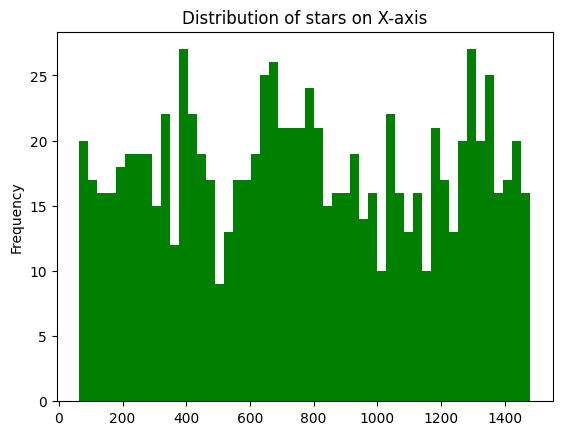

In [41]:
# Create interval object
interval = MinMaxInterval()
vmin, vmax = interval.get_limits(image[:,:,:3])

# Create an ImageNormalize object using a SqrtStretch object
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=SqrtStretch())

plt.scatter(stars[:,0], stars[:,1], color="green", s=1, label="Stars")
plt.scatter(galaxies[:,0], galaxies[:,1], color="red", s=1, label="Galaxies")
plt.imshow(image[:,:,:3], norm=norm)
plt.legend()
plt.title(f"Image {file_to_use} as irg image, with stars and galaxies marked")
plt.show()